In [1]:
from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName("Spark_Project").config("spark.sql.shuffle.partitions", "8").config("spark.executor.memory", "8g").getOrCreate()

df = spark.read.csv('DataSet_Emails/DataSet_Emails.csv',header=True,inferSchema=True , multiLine=True , escape='"')

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/26 13:47:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/26 13:47:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- message_id: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- label_text: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- date: date (nullable = true)



In [3]:
df.describe().show()

25/11/26 13:47:09 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
25/11/26 13:47:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:47:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv


+-------+-----------------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|summary|              _c0|        message_id|                text|             label|label_text|             subject|             message|
+-------+-----------------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|  count|            31716|             31716|               31665|             31716|     31716|               31442|               31371|
|   mean|          15857.5|16854.187539412284|                NULL|0.5096165973010468|      NULL|            386429.0|            71403.25|
| stddev|9155.764905238666| 9734.616391716854|                NULL|0.4999153936875302|      NULL|  481877.22667086066|   136659.2035841348|
|    min|                0|                 0| ( b  $ b ! zck...|                 0|       ham|                ( b| & who wants to ...|
|    max|           

In [4]:
df.show(5)

+---+----------+--------------------+-----+----------+--------------------+--------------------+----------+
|_c0|message_id|                text|label|label_text|             subject|             message|      date|
+---+----------+--------------------+-----+----------+--------------------+--------------------+----------+
|  0|     33214|any software just...|    1|      spam|any software just...|understanding oem...|2005-06-18|
|  1|     11929|perspective on fe...|    0|       ham|perspective on fe...|19 th , 2 : 00 pm...|2001-06-19|
|  2|     19784|wanted to try ci ...|    1|      spam|wanted to try ci ...|viagra at $ 1 . 1...|2004-09-11|
|  3|      2209|enron / hpl actua...|    0|       ham|enron / hpl actua...|teco tap 30 . 000...|2000-12-12|
|  4|     15880|looking for cheap...|    1|      spam|looking for cheap...|water past also ,...|2005-02-13|
+---+----------+--------------------+-----+----------+--------------------+--------------------+----------+
only showing top 5 rows



25/11/26 13:47:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv


In [5]:
df = df.select('label' , 'text')


In [6]:
df = df.dropDuplicates()


In [7]:
from pyspark.sql.functions import col, sum

missing_data = df.filter(" OR ".join([f"{c} IS NULL" for c in df.columns]))
null_counts = missing_data.select([sum(col(c).isNull().cast("int")).alias(c) for c in missing_data.columns])
null_counts.show()


25/11/26 13:47:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:47:16 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
25/11/26 13:47:16 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+-----+----+
|label|text|
+-----+----+
|    0|   1|
+-----+----+



In [8]:
df_clean = df.dropna()

In [9]:
df_clean.groupBy('label').count().show()

25/11/26 13:47:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv


+-----+-----+
|label|count|
+-----+-----+
|    1|13829|
|    0|14982|
+-----+-----+



25/11/26 13:47:26 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv


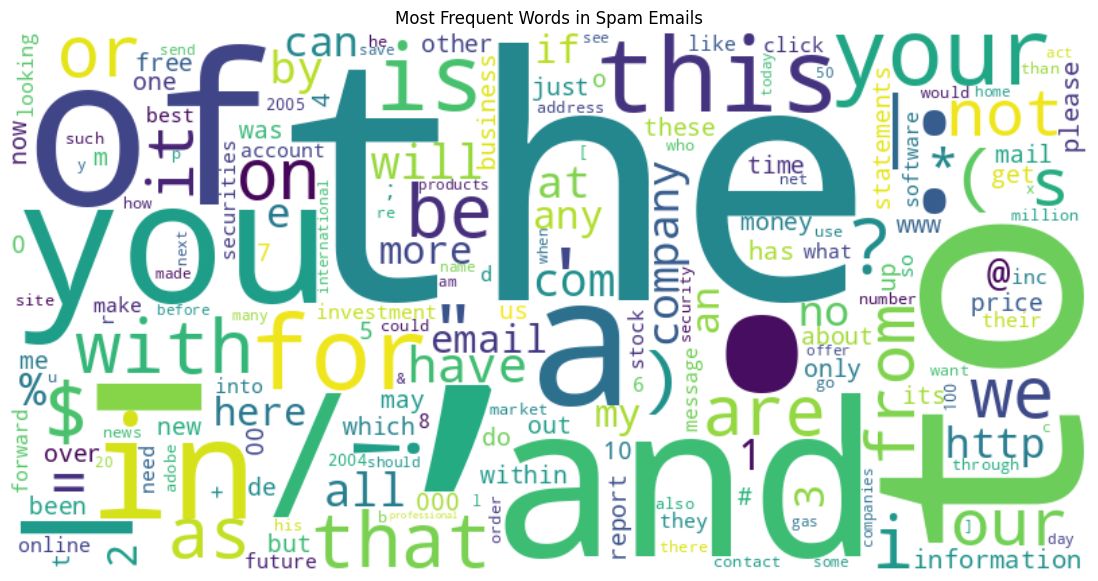

25/11/26 13:47:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv


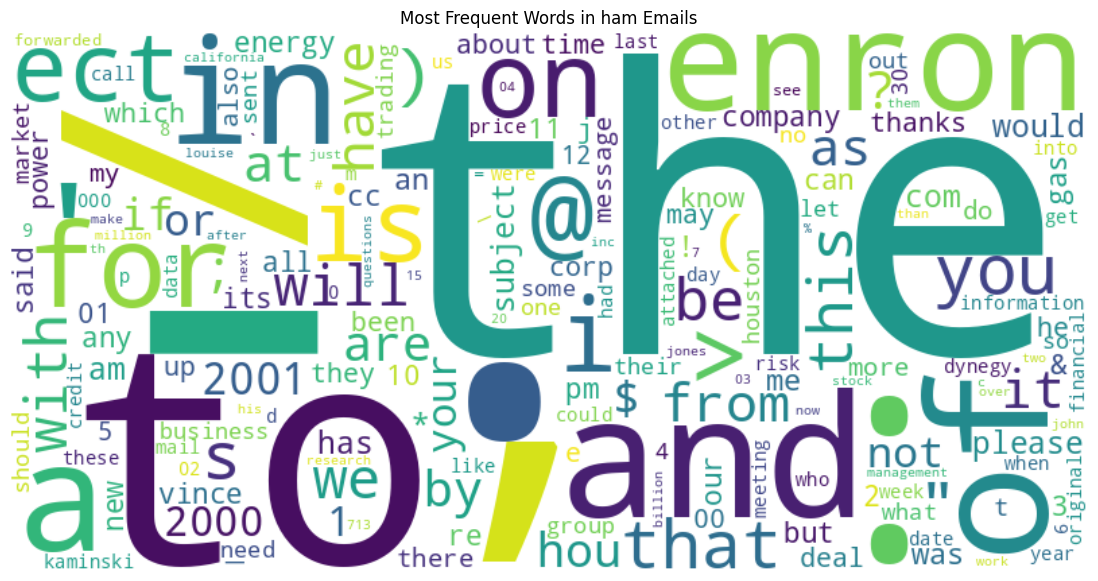

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, explode, split, lower

spam_df = df_clean.filter(col('label') == 1)
ham_df = df_clean.filter(col('label') == 0)

def create_wordcloud(title , df):
    words_df = df.select(explode(split(lower(col('text')), r'\s+')).alias('word'))
    
    word_freq = words_df.groupBy('word').count()

    top_words = word_freq.orderBy(col('count').desc()).limit(1000).collect()

    freq_dict = {row['word']: row['count'] for row in top_words}

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

    plt.figure(figsize=(15,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

create_wordcloud("Most Frequent Words in Spam Emails" , spam_df)
create_wordcloud("Most Frequent Words in ham Emails" , ham_df)



In [11]:
df_lower = (
    df_clean.withColumn("text", lower(col("text")))
)
df_lower.show()

25/11/26 13:47:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv


+-----+--------------------+
|label|                text|
+-----+--------------------+
|    0|tenaska darren ,\...|
|    1|rolex watches sta...|
|    0|fw : vince and ra...|
|    1|signups with your...|
|    1|failure notice hi...|
|    0|funding deal loui...|
|    0|re : statistician...|
|    1|considered unsoli...|
|    0|10 % off ! our gi...|
|    0|fw : final revise...|
|    0|rick jones ' addr...|
|    0|settlement i made...|
|    1|delivery status n...|
|    0|fw : screen shots...|
|    1|dowlnoadable 70 +...|
|    0|fwd : enjoy fall ...|
|    0|anniversary hi , ...|
|    0|start date : 1 / ...|
|    1|perfect logo char...|
|    1|office xp - $ 60 ...|
+-----+--------------------+
only showing top 20 rows



In [20]:
from pyspark.ml.feature import RegexTokenizer

regex_tokenizer = RegexTokenizer(
    inputCol="text",
    outputCol="tokens",
    pattern="\\W+"    
)

In [21]:
from pyspark.ml.feature import StopWordsRemover

remover = StopWordsRemover(
    inputCol="tokens",
    outputCol="tokens_no_sw"
)

In [22]:
from StemmerTransformer import StemmerTransformer

stemmer_transform = StemmerTransformer(inputCol="tokens_no_sw", outputCol="stemmed_tokens")


In [23]:
from pyspark.ml.feature import HashingTF , IDF

hashingTF = HashingTF(
    inputCol="stemmed_tokens",
    outputCol="raw_features",
    numFeatures=20000
)

idf = IDF(
    inputCol="raw_features",
    outputCol="features"
)



In [24]:
train_df, test_df = df_lower.randomSplit([0.8, 0.2], seed=42)

In [25]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

preproc_stages = [regex_tokenizer, remover, stemmer_transform, hashingTF, idf]

lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=20)
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)

In [26]:
from pyspark.ml import Pipeline


pipeline_lr = Pipeline(stages=preproc_stages + [lr])
pipeline_rf = Pipeline(stages=preproc_stages +[rf])

In [27]:
model_lr = pipeline_lr.fit(train_df)
model_rf = pipeline_rf.fit(train_df)


25/11/26 13:50:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:50:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:50:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:51:07 WARN InstanceBuilder: Failed to load implementati

In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_f1  = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

def evaluate_model(model, test_df):
    preds = model.transform(test_df)
    acc = evaluator_acc.evaluate(preds)
    f1  = evaluator_f1.evaluate(preds)
    return acc, f1

acc_lr, f1_lr = evaluate_model(model_lr, test_df)
acc_rf, f1_rf = evaluate_model(model_rf, test_df)

print("LogisticReg  -> acc: {:.4f} | f1: {:.4f}".format(acc_lr, f1_lr))
print("RandomForest -> acc: {:.4f} | f1: {:.4f}".format(acc_rf, f1_rf))


25/11/26 13:52:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:52:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:53:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///app/DataSet_Emails/DataSet_Emails.csv
25/11/26 13:53:10 WARN CSVHeaderChecker: CSV header does not confor

LogisticReg  -> acc: 0.9793 | f1: 0.9793
RandomForest -> acc: 0.9275 | f1: 0.9274
